In [76]:
import pandas as pd
import numpy as np
import seaborn as sns

# Business Understanding

I chose the Stack overflow dataset from 2019 to 2021, to check trans community insights inside the IT community around world.

I've created 3 questions about it:

* 1 How has the number of trans people identified in the survey changed in the past three years?
* 2 What are the top and bottom countries by number of trans people?
* 3 What is the current situation with programming skills by trans people?

# Data Understanding

## Access and load datasets 

In [77]:
df_arr =[]
df = pd.DataFrame()
years= [2019,2020,2021]

for year in years:
    filename ='survey_results_public_'+str(year)+'.csv'
    df_tmp = pd.read_csv(filename,encoding='latin-1');
    df_tmp['yearData'] = year;
    print(" ")
    print("Year "+str(year));
    print("Total Rows: "+str(df_tmp.shape[0]));
    print("Total Columns merged: "+str(df_tmp.shape[1]));
    df = df.append(df_tmp, sort=False);
    df_arr.append(df_tmp)
print(" ")
print("All Years")
print("Total Rows: "+str(df.shape[0]))
print("Total Columns merged: "+str(df.shape[1]))

 
Year 2019
Total Rows: 88883
Total Columns merged: 86
 
Year 2020
Total Rows: 64461
Total Columns merged: 62
 
Year 2021
Total Rows: 83439
Total Columns merged: 49
 
All Years
Total Rows: 236783
Total Columns merged: 126


In [78]:
df = df[common_cols]
print("Total Rows: "+str(df.shape[0]))
print("Total Columns merged: "+str(df.shape[1]))

Total Rows: 236783
Total Columns merged: 24


In [79]:
df.head()

,SOAccount,Gender,DevType,CompTotal,SOPartFreq,Trans,CompFreq,MainBranch,Country,SOComm,...,YearsCode,Age1stCode,yearData,Sexuality,OpSys,SurveyLength,Employment,SOVisitFreq,EdLevel,OrgSize
0,No,Man,NaN,NaN,NaN,No,NaN,I am a student who is learning to code,United Kingdom,Neutral,...,4,10,2019,Straight / Heterosexual,Windows,Appropriate in length,"Not employed, and not looking for work",A few times per month or weekly,Primary/elementary school,NaN
1,Yes,Man,"Developer, desktop or enterprise applications;...",NaN,A few times per month or weekly,No,NaN,I am a student who is learning to code,Bosnia and Herzegovina,"Yes, somewhat",...,NaN,17,2019,Straight / Heterosexual,Windows,Appropriate in length,"Not employed, but looking for work",Daily or almost daily,"Secondary school (e.g. American high school, G...",NaN
2,Yes,Man,"Designer;Developer, back-end;Developer, front-...",23000.0,Less than once per month or monthly,No,Monthly,"I am not primarily a developer, but I write co...",Thailand,Neutral,...,3,22,2019,Straight / Heterosexual,Linux-based,Appropriate in length,Employed full-time,A few times per week,"Bachelorâs degree (BA, BS, B.Eng., etc.)",100 to 499 employees
3,Yes,Man,"Developer, full-stack",61000.0,Less than once per month or monthly,No,Yearly,I am a developer by profession,United States,"No, not really",...,3,16,2019,Straight / Heterosexual,Windows,Appropriate in length,Employed full-time,Daily or almost daily,"Bachelorâs degree (BA, BS, B.Eng., etc.)",100 to 499 employees
4,Yes,Man,"Academic researcher;Developer, desktop or ente...",NaN,A few times per month or weekly,No,NaN,I am a developer by profession,Ukraine,"Yes, definitely",...,16,14,2019,Straight / Heterosexual,Linux-based,Appropriate in length,Employed full-time,Multiple times per day,"Bachelorâs degree (BA, BS, B.Eng., etc.)","10,000 or more employees"


In [80]:
df.describe()

,CompTotal,yearData
count,1.379540e+05,236783.000000
mean,8.054215e+241,2019.977008
std,inf,0.852782
min,0.000000e+00,2019.000000
25%,1.850000e+04,2019.000000
50%,6.500000e+04,2020.000000
75%,1.280000e+05,2021.000000
max,1.111111e+247,2021.000000


array([[<AxesSubplot:title={'center':'CompTotal'}>,
        <AxesSubplot:title={'center':'yearData'}>]], dtype=object)

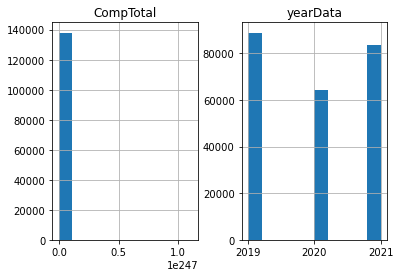

In [81]:
df.hist()

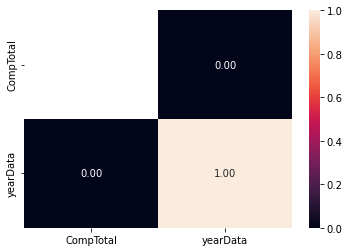

In [82]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

# Prepare Data

### Use just common columns 

In [83]:
common_cols = list(set.intersection(*(set(df.columns) for df in df_arr)))
common_cols

['SOAccount',
 'Gender',
 'DevType',
 'CompTotal',
 'SOPartFreq',
 'Trans',
 'CompFreq',
 'MainBranch',
 'Country',
 'SOComm',
 'Age',
 'YearsCodePro',
 'SurveyEase',
 'Ethnicity',
 'YearsCode',
 'Age1stCode',
 'yearData',
 'Sexuality',
 'OpSys',
 'SurveyLength',
 'Employment',
 'SOVisitFreq',
 'EdLevel',
 'OrgSize']

### Checking and Fixing missing data

In [84]:
df.isnull().sum()

SOAccount        9625
Gender          18534
DevType         39594
CompTotal       98829
SOPartFreq      47746
Trans           23153
CompFreq        81296
MainBranch        851
Country           521
SOComm           9857
Age             29720
YearsCodePro    54887
SurveyEase      15952
Ethnicity       34703
YearsCode        9520
Age1stCode       8006
yearData            0
Sexuality       43278
OpSys            9410
SurveyLength    16387
Employment       2425
SOVisitFreq      9137
EdLevel          9836
OrgSize         59932
dtype: int64

In [85]:
#Checking missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [86]:
missing_value_df

,column_name,percent_missing
SOAccount,SOAccount,4.064903
Gender,Gender,7.827420
DevType,DevType,16.721640
CompTotal,CompTotal,41.738216
SOPartFreq,SOPartFreq,20.164454
Trans,Trans,9.778151
CompFreq,CompFreq,34.333546
MainBranch,MainBranch,0.359401
Country,Country,0.220033
SOComm,SOComm,4.162883


### Fill missing values 

In [87]:
df['MainBranch'].fillna('None of these', inplace=True)
df['Trans'].fillna('Prefer not to say', inplace=True)
df['Sexuality'].fillna('Prefer not to say', inplace=True)
df['Gender'].fillna('Prefer not to say', inplace=True)
df['Country'].fillna('Prefer not to say', inplace=True)

### Create an id column with index to use on the group by
#### Because I needed a column with unique values

In [88]:
df.reset_index(level=0, inplace=True)
df.reset_index(level=0, inplace=True)
df.head()

,level_0,index,SOAccount,Gender,DevType,CompTotal,SOPartFreq,Trans,CompFreq,MainBranch,...,YearsCode,Age1stCode,yearData,Sexuality,OpSys,SurveyLength,Employment,SOVisitFreq,EdLevel,OrgSize
0,0,0,No,Man,NaN,NaN,NaN,No,NaN,I am a student who is learning to code,...,4,10,2019,Straight / Heterosexual,Windows,Appropriate in length,"Not employed, and not looking for work",A few times per month or weekly,Primary/elementary school,NaN
1,1,1,Yes,Man,"Developer, desktop or enterprise applications;...",NaN,A few times per month or weekly,No,NaN,I am a student who is learning to code,...,NaN,17,2019,Straight / Heterosexual,Windows,Appropriate in length,"Not employed, but looking for work",Daily or almost daily,"Secondary school (e.g. American high school, G...",NaN
2,2,2,Yes,Man,"Designer;Developer, back-end;Developer, front-...",23000.0,Less than once per month or monthly,No,Monthly,"I am not primarily a developer, but I write co...",...,3,22,2019,Straight / Heterosexual,Linux-based,Appropriate in length,Employed full-time,A few times per week,"Bachelorâs degree (BA, BS, B.Eng., etc.)",100 to 499 employees
3,3,3,Yes,Man,"Developer, full-stack",61000.0,Less than once per month or monthly,No,Yearly,I am a developer by profession,...,3,16,2019,Straight / Heterosexual,Windows,Appropriate in length,Employed full-time,Daily or almost daily,"Bachelorâs degree (BA, BS, B.Eng., etc.)",100 to 499 employees
4,4,4,Yes,Man,"Academic researcher;Developer, desktop or ente...",NaN,A few times per month or weekly,No,NaN,I am a developer by profession,...,16,14,2019,Straight / Heterosexual,Linux-based,Appropriate in length,Employed full-time,Multiple times per day,"Bachelorâs degree (BA, BS, B.Eng., etc.)","10,000 or more employees"


### Replace reduntant values with different names to one unique value

In [89]:
df['Trans'].replace({"Or, in your own words:": "Prefer not to say"}, inplace=True)
df['Country'].replace({"United States of America": "United States"}, inplace=True)

#### Export clean dataset to use on Tableau Dashboard 

In [90]:
df.to_csv('main_data.csv')

# Question 1:  
### How has the number of trans people identified in the survey changed in the past three years?

#### Analyze

In [91]:
df_transpercent = df.pivot_table('level_0', index='yearData', columns='Trans', aggfunc='count').reset_index()
df_transpercent = df_transpercent.sort_values('yearData')
df_transpercent.to_csv('data_percent_per_year.csv',index=False)
df_transpercent.head()

Trans,yearData,No,Prefer not to say,Yes
0,2019,82576,5276,1031
1,2020,48871,15116,474
2,2021,77275,5129,1035


### Visulize

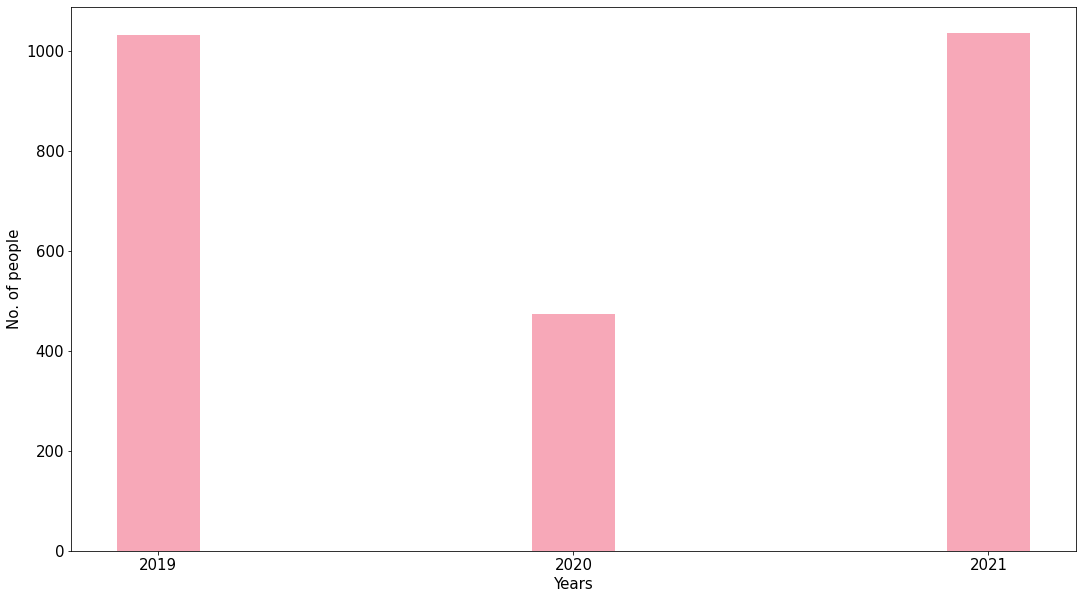

In [92]:
import matplotlib.pyplot as plt  
  
fig = plt.figure(figsize = (18, 10)) 
  
# creating the bar plot 
plt.bar(df_transpercent['yearData'], df_transpercent['Yes'], color ='#F7A8B8',  
        width = 0.2) 
plt.xticks(list(df_transpercent['yearData']),fontsize=15)  
plt.ylabel("No. of people",fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel("Years",fontsize=15) 
plt.show() 

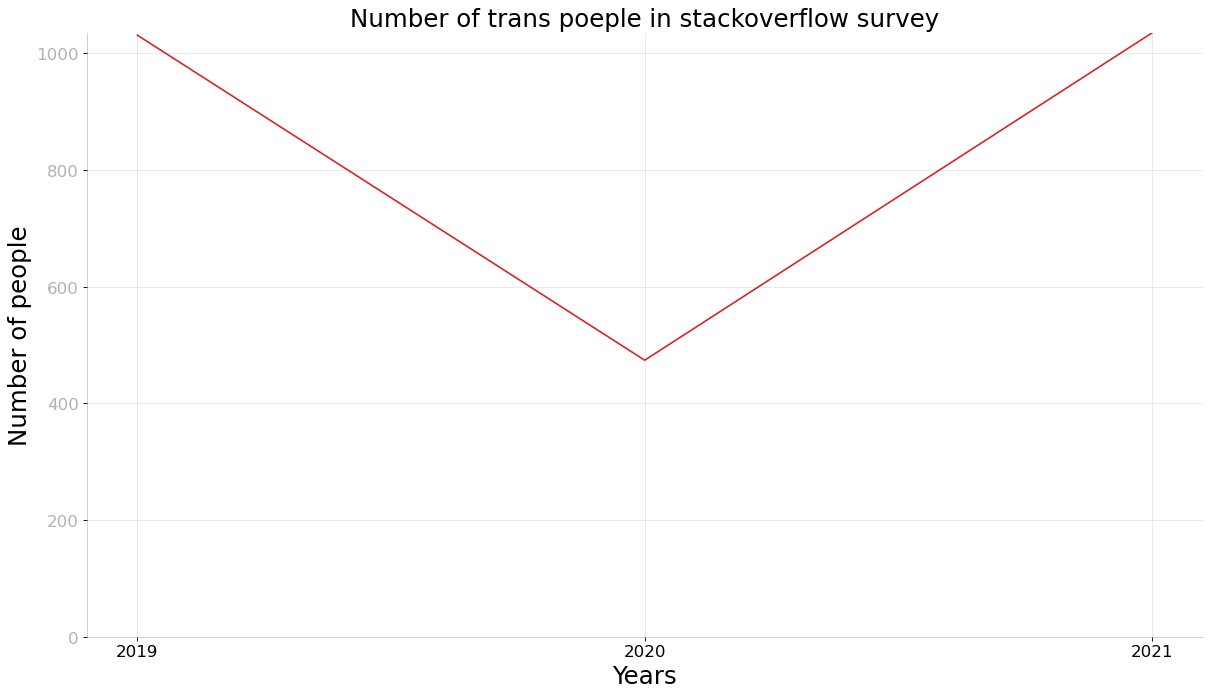

In [93]:
# Draw Plot
plt.figure(figsize=(18,10), dpi= 80)
plt.plot('yearData', 'Yes', data=df_transpercent, color='tab:red')

# Decoration
plt.ylim(0, df_transpercent['Yes'].max()+0.2)
xtick_location = df_transpercent['Yes'].tolist()
xtick_labels = [x[-3:] for x in df_transpercent.yearData.astype(str).tolist()]
plt.xticks(list(df_transpercent['yearData']),fontsize=15)
plt.yticks(fontsize=15, alpha=.3)
plt.title("Number of trans poeple in stackoverflow survey", fontsize=22)
plt.grid(axis='both', alpha=.3)
plt.xlabel('Years',fontsize=22)
plt.ylabel('Number of people',fontsize=22)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.2)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.2)   
plt.show()

### Explain the visualization

In the both charts show that we do not have too much trans people in the survey and we have a descrese from 2019 to 2020 and an increse from 2020 to 2021. 

# Question 2
### What are the top and bottom countries by number of trans people?

### Analyze

In [94]:
df_trans = df.groupby(['yearData','Trans','Country']).agg({'level_0': 'count'})
df_trans.to_csv('data_percent_per_year_country.csv')
df_trans

level_0
yearData Trans Country                                                    
2019     No    Afghanistan                                              22
               Albania                                                  78
               Algeria                                                 100
               Andorra                                                   4
               Angola                                                    4
...                                                                    ...
2021     Yes   United Arab Emirates                                      2
               United Kingdom of Great Britain and Northern Ir...       77
               United States                                           293
               Uruguay                                                   2
               Viet Nam                                                  9

[1241 rows x 1 columns]

In [95]:
df_transpercountry = df_trans.pivot_table('level_0', index='Country', columns='Trans', aggfunc='sum').reset_index()
df_transpercountry['Yes'].fillna(0.00, inplace=True)
df_transpercountry = df_transpercountry.sort_values('Yes', ascending=False)
df_trans.to_csv('data_percent_per_year_country.csv',index=False)
top_highest = df_transpercountry.head(10)
df_transpercountry = df_transpercountry.sort_values('Yes', ascending=True)
top_lowest = df_transpercountry.head(10)

### Vizualize

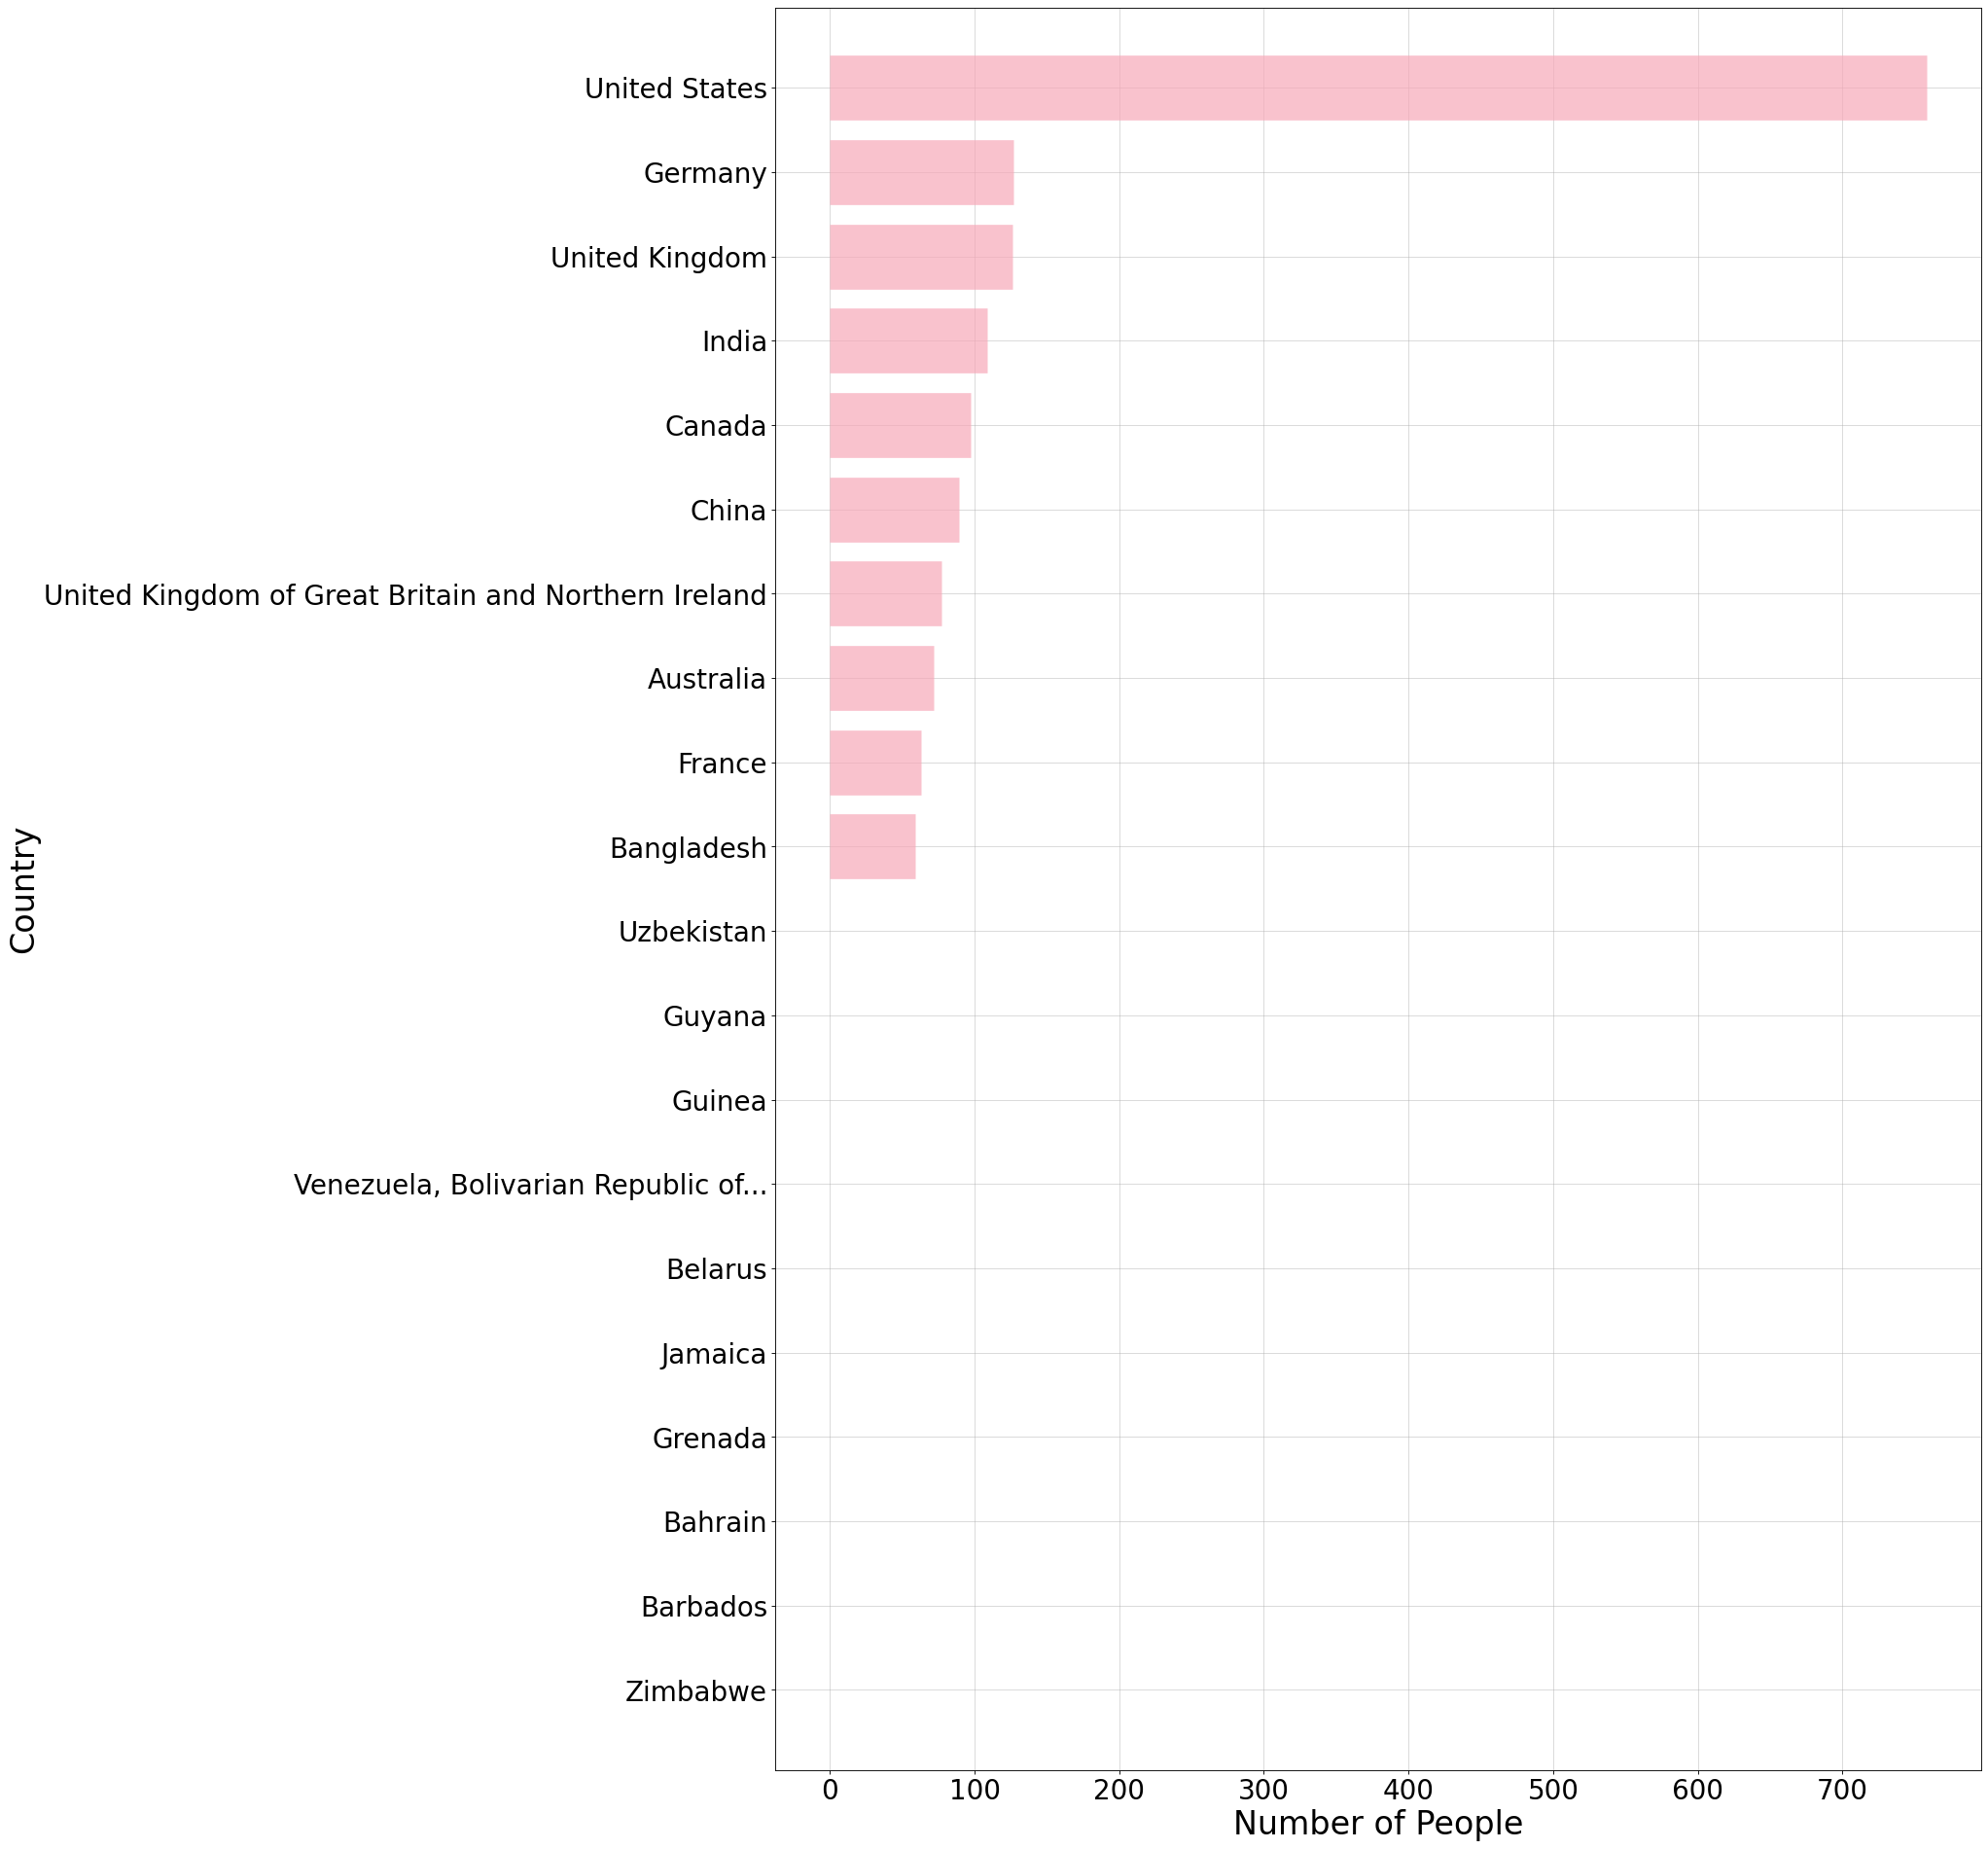

In [96]:
# Prepare Data
df2 = top_lowest.append(top_highest, sort=False);
x = df2.loc[:, ['Yes']]
df2['colors'] = ['#55CDFC' if x < 0 else '#F7A8B8' for x in df2['Yes']]
df2.sort_values('Yes', inplace=True)
df2.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(20,30), dpi= 80)
plt.hlines(y=df2.index, xmin=0, xmax=df2.Yes, color=df2.colors, alpha=0.7, linewidth=60)

# Decorations
plt.xlabel('Number of People',fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.yticks(df2.index, df2.Country, fontsize=25)
plt.xticks(fontsize=25)
plt.grid(linestyle='-', alpha=0.5)
plt.show()

### Explain the visualization

It is evident in the bar chart top and bottom 10 countries by number of trans people in the Stack overflow survey. 

# Question 3
### What is the current situation with programming skills by trans people?

### Analyze

In [97]:
df['MainBranch']

0                    I am a student who is learning to code
1                    I am a student who is learning to code
2         I am not primarily a developer, but I write co...
3                            I am a developer by profession
4                            I am a developer by profession
                                ...                        
236778                       I am a developer by profession
236779                       I am a developer by profession
236780                       I am a developer by profession
236781                       I am a developer by profession
236782                       I am a developer by profession
Name: MainBranch, Length: 236783, dtype: object

In [98]:
df_trans = df.groupby(['MainBranch','Trans']).agg({'level_0': 'count'})
df_trans

level_0
MainBranch                                         Trans                     
I am a developer by profession                     No                  152591
                                                   Prefer not to say    16952
                                                   Yes                   1482
I am a student who is learning to code             No                   25836
                                                   Prefer not to say     3885
                                                   Yes                    467
I am not primarily a developer, but I write cod... No                   17132
                                                   Prefer not to say     2285
                                                   Yes                    202
I code primarily as a hobby                        No                    8965
                                                   Prefer not to say     1354
                                                   Yes                    264
I used to be a developer by profession, but no ... No                    3378
                                                   Prefer not to say      553
                                                   Yes                     73
None of these                                      No                     820
                                                   Prefer not to say      492
                                                   Yes                     52

In [99]:
df_transpercountry = df_trans.pivot_table('level_0', index='MainBranch', columns='Trans', aggfunc='sum').reset_index()
df_transpercountry['Yes'].fillna(0.00, inplace=True)

In [100]:
df_transpercountry

Trans,MainBranch,No,Prefer not to say,Yes
0,I am a developer by profession,152591,16952,1482
1,I am a student who is learning to code,25836,3885,467
2,"I am not primarily a developer, but I write co...",17132,2285,202
3,I code primarily as a hobby,8965,1354,264
4,"I used to be a developer by profession, but no...",3378,553,73
5,None of these,820,492,52


### Visualize

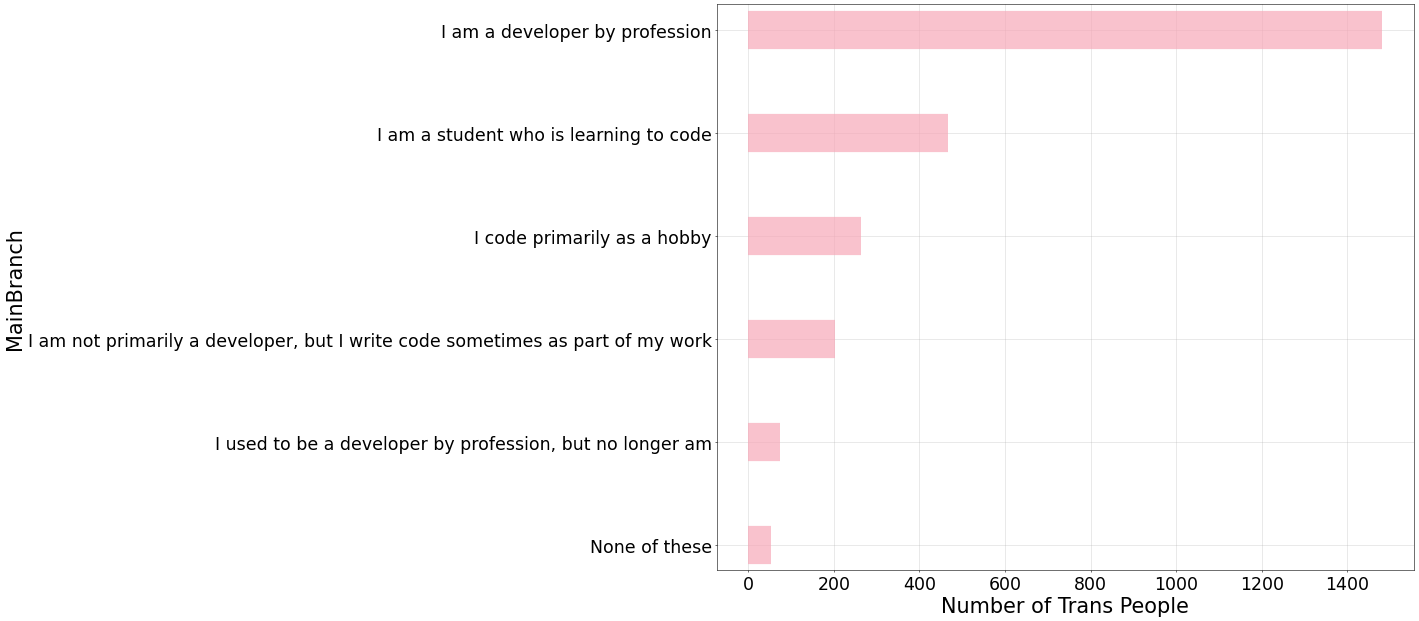

In [101]:
# Prepare Data
df2 = df_transpercountry
x = df2.loc[:, ['Yes']]
df2['colors'] = ['#F7A8B8' if x < 0 else '#F7A8B8' for x in df2['Yes']]
df2.sort_values('Yes', inplace=True)
df2.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(18,15), dpi= 50)
plt.hlines(y=df2.index, xmin=0, xmax=df2.Yes, color=df2.colors, alpha=0.7, linewidth=55)

# Decorations
plt.xlabel('Number of Trans People',fontsize=30)
plt.ylabel('MainBranch',fontsize=30)
plt.yticks(df2.index, df2.MainBranch, fontsize=25)
plt.xticks(fontsize=25)
plt.grid(linestyle='-', alpha=0.5)
plt.show()

### Explain the visualization
More than 1400 trans people work as developer  and the others are in progress with programming as student.

# Evaluation

Even with many people in the survey, trans community needs more incentive from companies, universities and the IT community for growing and transform the IT community a place with more diversity.